In [1]:
import os
import mne

sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file, verbose=False)
raw.crop(tmax=60).load_data()
raw.pick(['EEG 0{:02}'.format(n) for n in range(41, 60)])

<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 19 x 36038 (60.0 sec), ~8.2 MB, data loaded>

In [2]:
# code lines below are commented out because the sample data doesn't have
# earlobe or mastoid channels, so this is just for demonstration purposes:

# use a single channel reference (left earlobe)
# raw.set_eeg_reference(ref_channels=['A1'])

# use average of mastoid channels as reference
# raw.set_eeg_reference(ref_channels=['M1', 'M2'])

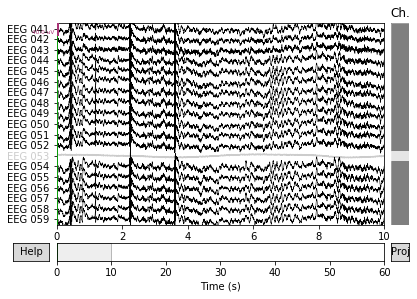

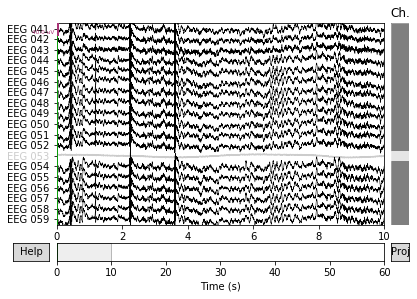

In [5]:
raw.plot()

EEG channel type selected for re-referencing
Applying a custom EEG reference.


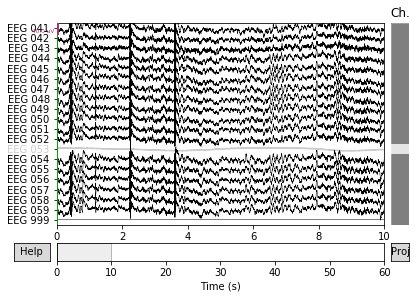

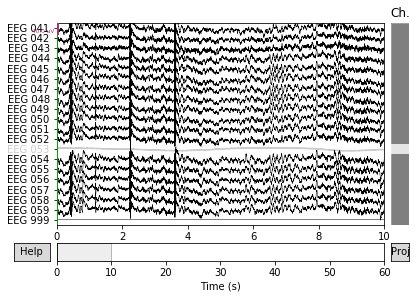

In [4]:
# add new reference channel (all zero)
raw_new_ref = mne.add_reference_channels(raw, ref_channels=['EEG 999'])
raw_new_ref.plot()

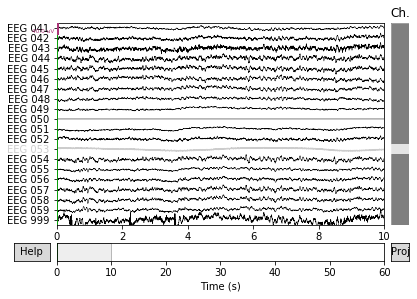

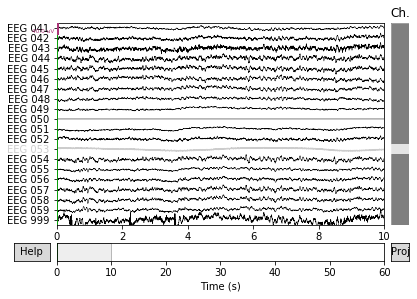

In [6]:
# set reference to `EEG 050`
raw_new_ref.set_eeg_reference(ref_channels=['EEG 050'])
raw_new_ref.plot()

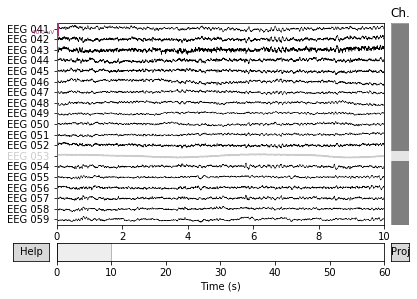

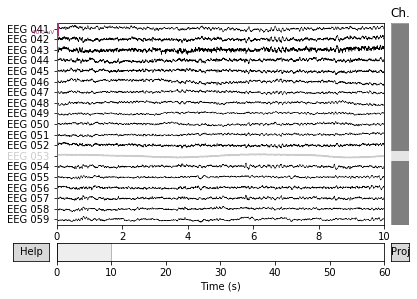

In [7]:
# use the average of all channels as reference
raw_avg_ref = raw.copy().set_eeg_reference(ref_channels='average')
raw_avg_ref.plot()

In [8]:
raw.set_eeg_reference('average', projection=True)
print(raw.info['projs'])

[<Projection  |  PCA-v1, active : False, n_channels : 102>, <Projection  |  PCA-v2, active : False, n_channels : 102>, <Projection  |  PCA-v3, active : False, n_channels : 102>, <Projection  |  Average EEG reference, active : False, n_channels : 18>]


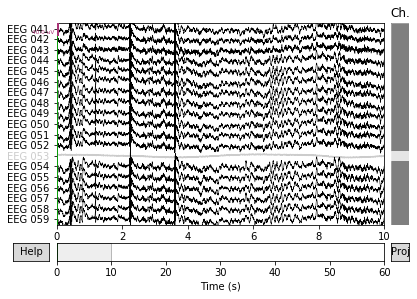

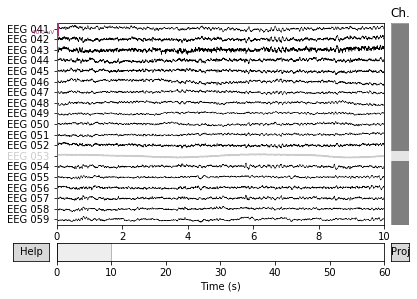

In [9]:
for title, proj in zip(['Original', 'Average'], [False, True]):
    fig = raw.plot(proj=proj, n_channels=len(raw))
    # make room for title
    fig.subplots_adjust(top=0.9)
    fig.suptitle('{} reference'.format(title), size='xx-large', weight='bold')